In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [170]:
plt.rcParams['font.family'] = ['Arial Unicode MS']
plt.rcParams['axes.unicode_minus']=False

# Data Cleaning

## Load in Data

In [171]:
Xtrain_new = pd.read_csv('Xtrain_new.csv',index_col=0)
Xtest_new = pd.read_csv('Xtest_new.csv',index_col=0)
Ytrain = pd.read_csv('Ytrain.csv',index_col=0,header=0)
#Ytrain = pd.Series(Ytrain.values.reshape(1,-1)[0])
Ytest = pd.read_csv('Ytest.csv',index_col=0,header=0)
#Ytest = pd.Series(Ytest.values.reshape(1,-1)[0],name='label')

In [172]:
Ytrain= Ytrain.reset_index(drop=True)
Ytest = Ytest.reset_index(drop=True)

In [173]:
Ytest

,label
0,0
1,1
2,0
3,0
4,0
...,...
206979,0
206980,0
206981,1
206982,0


In [174]:
Ytrain

,label
0,0
1,0
2,0
3,0
4,0
...,...
482956,0
482957,1
482958,0
482959,0


In [175]:
data_train = pd.read_csv('data_train.csv',index_col=0)
data_test = pd.read_csv('data_test.csv',index_col=0)

In [176]:
Xtrain_new.shape
Xtrain_new

,d,arrival,lasthtlordergap,cityorders,lastpvgap,cr,sid,visitnum_oneyear,h
0,2016-05-17,2016-05-21,713.0,0.680000,312.0,1.140000,111.0,2162.0,18.0
1,2016-05-15,2016-05-15,97890.0,0.027000,3594.0,1.000000,54.0,1397.0,22.0
2,2016-05-15,2016-05-15,4601.0,0.813000,299.0,1.070000,385.0,2881.0,15.0
3,2016-05-16,2016-05-16,-1.0,3.033000,1273.0,1.000000,37.0,1218.0,15.0
4,2016-05-16,2016-05-20,52076.0,0.013000,31216.0,2.000000,61.0,318.0,5.0
...,...,...,...,...,...,...,...,...,...
482956,2016-05-17,2016-05-17,1947.0,2.047000,1852.0,1.500000,6.0,289.0,12.0
482957,2016-05-21,2016-06-08,484891.0,0.013000,5922.0,1.137801,246.0,558.0,23.0
482958,2016-05-20,2016-05-26,-1.0,0.113000,2033.0,1.137801,6.0,1772.0,3.0
482959,2016-05-21,2016-05-21,-1.0,2.250719,2838.0,1.137801,655.0,1316.0,21.0


In [177]:
Xtest_new.shape
Xtest_new

,d,arrival,lasthtlordergap,cityorders,lastpvgap,cr,sid,visitnum_oneyear,h
0,2016-05-20,2016-05-21,218111.0,0.107,179.0,1.000000,530,3415.0,6
1,2016-05-15,2016-05-15,-1.0,9.160,35.0,1.000000,7,649.0,8
2,2016-05-15,2016-05-15,19564.0,8.467,1725.0,1.050000,73,2979.0,12
3,2016-05-20,2016-05-20,-1.0,6.960,250.0,1.136717,43,366.0,1
4,2016-05-20,2016-06-07,-1.0,0.060,27344.0,1.136717,11,507.0,1
...,...,...,...,...,...,...,...,...,...
206979,2016-05-16,2016-05-28,-1.0,0.007,237.0,1.000000,25,914.0,17
206980,2016-05-15,2016-05-15,9379.0,0.067,1089.0,1.030000,459,3981.0,6
206981,2016-05-19,2016-06-09,27747.0,0.547,640.0,1.136717,240,2624.0,17
206982,2016-05-19,2016-05-22,35.0,0.107,28.0,2.000000,37,314.0,22


In [178]:
data_train.shape
data_train

,sampleid,d,arrival
512823,879915,2016-05-17,2016-05-21
28998,73262,2016-05-15,2016-05-15
175239,316906,2016-05-15,2016-05-15
276529,485736,2016-05-16,2016-05-16
227980,404846,2016-05-16,2016-05-20
...,...,...,...
321481,560456,2016-05-17,2016-05-17
303174,529935,2016-05-21,2016-06-08
2878,29457,2016-05-20,2016-05-26
649118,1106538,2016-05-21,2016-05-21


In [179]:
data_test.shape
data_test

,sampleid,d,arrival
606219,1035222,2016-05-20,2016-05-21
118709,222533,2016-05-15,2016-05-15
495882,851761,2016-05-15,2016-05-15
149061,273451,2016-05-20,2016-05-20
183546,330795,2016-05-20,2016-06-07
...,...,...,...
529313,907321,2016-05-16,2016-05-28
116108,218285,2016-05-15,2016-05-15
346286,601862,2016-05-19,2016-06-09
608532,1038976,2016-05-19,2016-05-22


## WOE Binning

In [180]:
features =  {'lasthtlordergap':'Time gap since last order within one year'
             ,'cityorders':'Number of orders submitted yesterday in current city within the date of arrival','lastpvgap':'Time length since last visit within one year'
            ,'cr':'Conversion Rate','sid':'Session Id','visitnum_oneyear':'Annual Visits'
            ,'h':'Time of Visit'}

In [181]:
pd.Series(features)

lasthtlordergap             Time gap since last order within one year
cityorders          Number of orders submitted yesterday in curren...
lastpvgap                Time length since last visit within one year
cr                                                    Conversion Rate
sid                                                        Session Id
visitnum_oneyear                                        Annual Visits
h                                                       Time of Visit
dtype: object

In [182]:
Ytest.value_counts()

label
0        150237
1         56747
dtype: int64

- Continuous Variable Binning：lasthtlordergap/lastpvgap  --Time length
- Categorical Variable Binning：sid / h

In [183]:
%run smob.py

<Figure size 432x288 with 0 Axes>

In [184]:
ytrain = 1-Ytrain

In [185]:
ytest = 1-Ytest

In [186]:
train_data = pd.concat([Xtrain_new.iloc[:,2:],ytrain],axis=1)
test_data = pd.concat([Xtest_new.iloc[:,2:],ytest],axis=1)
train_data.rename(columns = {0:'label'},inplace=True)
test_data.rename(columns = {0:'label'},inplace = True)
y = 'label'

In [187]:
train_data.head()

,lasthtlordergap,cityorders,lastpvgap,cr,sid,visitnum_oneyear,h,label
0,713.0,0.680,312.0,1.14,111.0,2162.0,18.0,1
1,97890.0,0.027,3594.0,1.00,54.0,1397.0,22.0,1
2,4601.0,0.813,299.0,1.07,385.0,2881.0,15.0,1
3,-1.0,3.033,1273.0,1.00,37.0,1218.0,15.0,1
4,52076.0,0.013,31216.0,2.00,61.0,318.0,5.0,1


In [188]:
test_data.head()

,lasthtlordergap,cityorders,lastpvgap,cr,sid,visitnum_oneyear,h,label
0,218111.0,0.107,179.0,1.000000,530,3415.0,6,1
1,-1.0,9.160,35.0,1.000000,7,649.0,8,0
2,19564.0,8.467,1725.0,1.050000,73,2979.0,12,1
3,-1.0,6.960,250.0,1.136717,43,366.0,1,1
4,-1.0,0.060,27344.0,1.136717,11,507.0,1,1


In [189]:
import seaborn as sns

In [190]:
l_ = ['Time gap since last order within one year'
,'Number of orders submitted yesterday in current city within the date of arrival'
,'Time length since last visit within one year'
,'Conversion rate'
,'Session Id'
 ,'Annual Visits'
 ,'Time of Visit']

In [191]:
len(train_data.columns[:-1])

7

In [192]:
len(test_data.columns[:-1])

7

In [193]:
train_data

,lasthtlordergap,cityorders,lastpvgap,cr,sid,visitnum_oneyear,h,label
0,713.0,0.680000,312.0,1.140000,111.0,2162.0,18.0,1
1,97890.0,0.027000,3594.0,1.000000,54.0,1397.0,22.0,1
2,4601.0,0.813000,299.0,1.070000,385.0,2881.0,15.0,1
3,-1.0,3.033000,1273.0,1.000000,37.0,1218.0,15.0,1
4,52076.0,0.013000,31216.0,2.000000,61.0,318.0,5.0,1
...,...,...,...,...,...,...,...,...
482956,1947.0,2.047000,1852.0,1.500000,6.0,289.0,12.0,1
482957,484891.0,0.013000,5922.0,1.137801,246.0,558.0,23.0,0
482958,-1.0,0.113000,2033.0,1.137801,6.0,1772.0,3.0,1
482959,-1.0,2.250719,2838.0,1.137801,655.0,1316.0,21.0,1


In [194]:
test_data

,lasthtlordergap,cityorders,lastpvgap,cr,sid,visitnum_oneyear,h,label
0,218111.0,0.107,179.0,1.000000,530,3415.0,6,1
1,-1.0,9.160,35.0,1.000000,7,649.0,8,0
2,19564.0,8.467,1725.0,1.050000,73,2979.0,12,1
3,-1.0,6.960,250.0,1.136717,43,366.0,1,1
4,-1.0,0.060,27344.0,1.136717,11,507.0,1,1
...,...,...,...,...,...,...,...,...
206979,-1.0,0.007,237.0,1.000000,25,914.0,17,1
206980,9379.0,0.067,1089.0,1.030000,459,3981.0,6,1
206981,27747.0,0.547,640.0,1.136717,240,2624.0,17,0
206982,35.0,0.107,28.0,2.000000,37,314.0,22,1


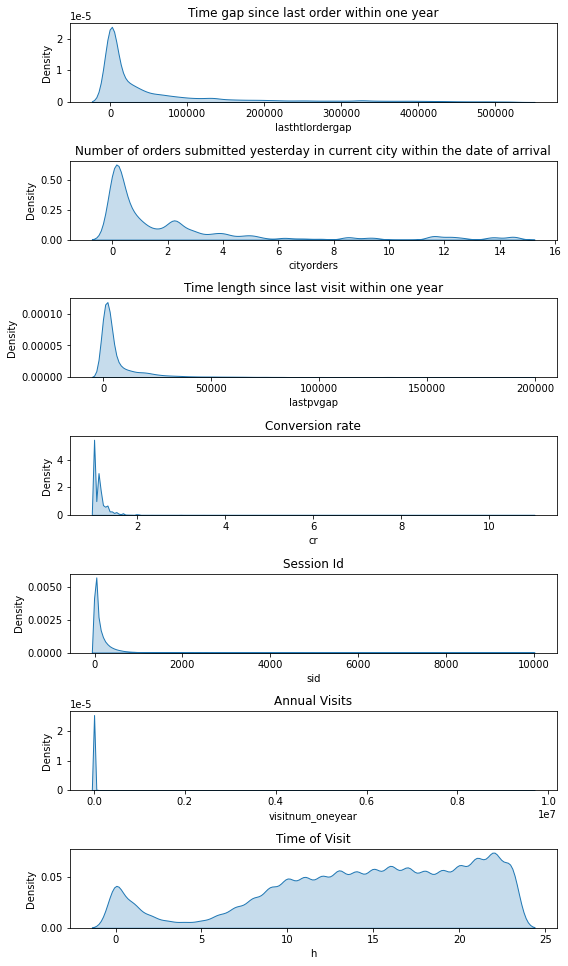

In [195]:
ax = plt.figure(figsize=(8,15))
for i in range(len(train_data.columns[:-1])):
    ax.add_subplot(8,1,i+1)
    sns.kdeplot(train_data.iloc[:,i],shade=True)
    plt.title(l_[i])
plt.tight_layout();

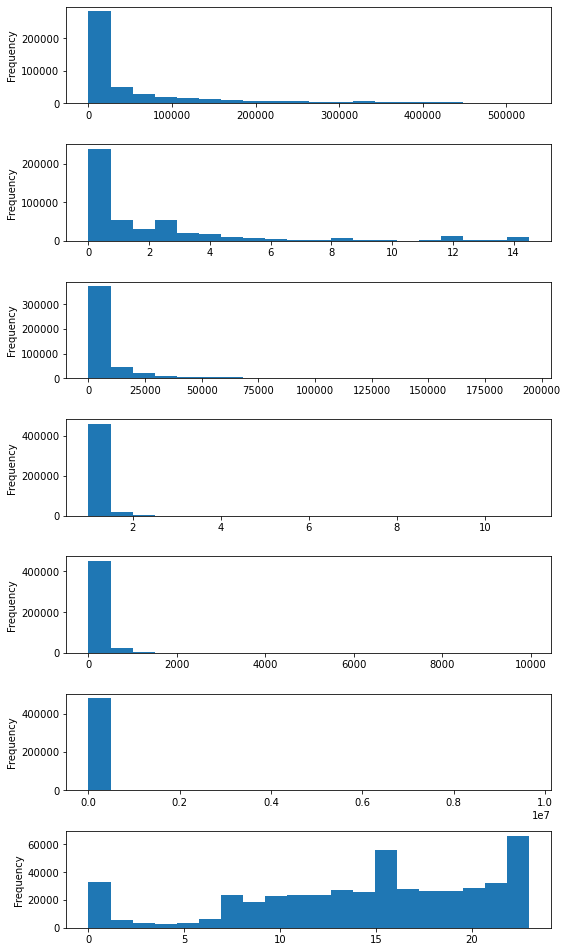

In [196]:
ax = plt.figure(figsize=(8,15))
for i in range(len(train_data.columns[:-1])):
    ax.add_subplot(8,1,i+1)
    train_data.iloc[:,i].plot(kind='hist',bins=20)
plt.tight_layout();

### WOE Binning

**lasthtlordergap (8 bins)**

In [197]:
iv_all = pd.Series()

<ipython-input-197-aeb4095af233>:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  iv_all = pd.Series()


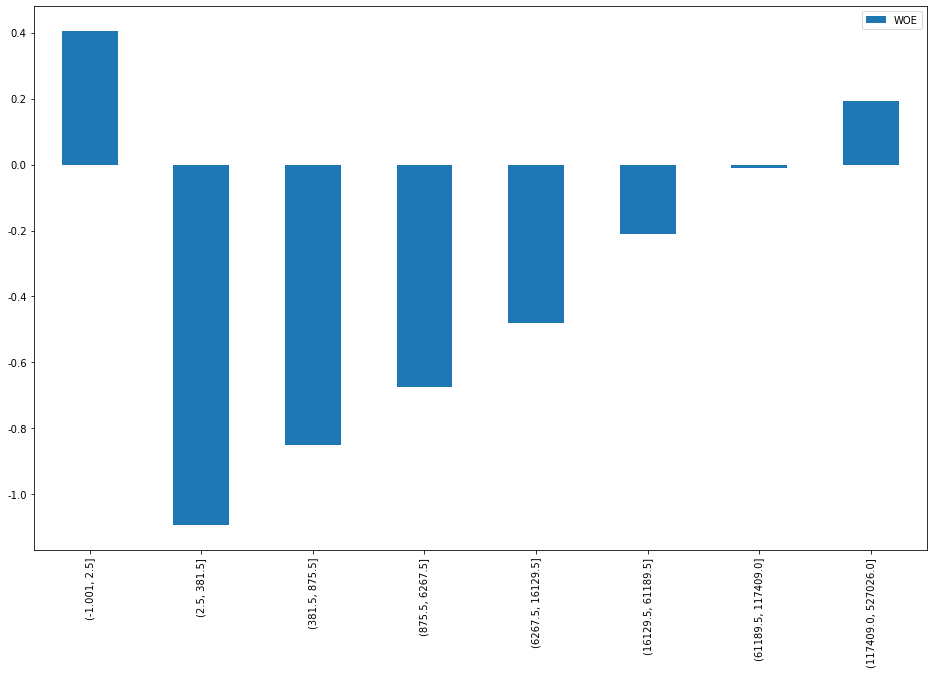

In [198]:
ordergap = smbin(train_data,y,'lasthtlordergap',max_bin = 8)

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np
import pandas as pd

df=train_data
x= 'lasthtlordergap'
y=y
max_bin = 8
p=0.01
plot=True

# specify X and Y variables, exclude NAs
X = np.array(df[x][df[x].notna()]).reshape(-1,1)
Y = df[y][df[x].notna()]
# adjust parameters, get best leaf's sample percentage
gini_impure = np.linspace(0,0.001,50)
param_grid = {"min_impurity_decrease":gini_impure}
Es = GridSearchCV(DecisionTreeClassifier(),param_grid,cv=5)
Es.fit(X,Y)
# use best param build tree model
ES = DecisionTreeClassifier(min_impurity_decrease = Es.best_params_["min_impurity_decrease"],
                                max_leaf_nodes = max_bin,
                                min_samples_leaf = p)    
ES.fit(X,Y)
# output tree structure
TS = tree_structure(ES,x)
# extract threshold of test node
TH = ES.tree_.threshold[ES.tree_.children_left != ES.tree_.children_right]
# calculate cutpoints
CP = np.append(TH,np.array([X.max(),X.min()]))
CP.sort()
# use customized binning function
#smbin_cust = smbin_cu(df,y,x,cutpoints = CP,plot = plot)    
#out_a = pd.Series({"Tree_structure":TS})
#out = smbin_cust.append(out_a)


<AxesSubplot:xlabel='category'>

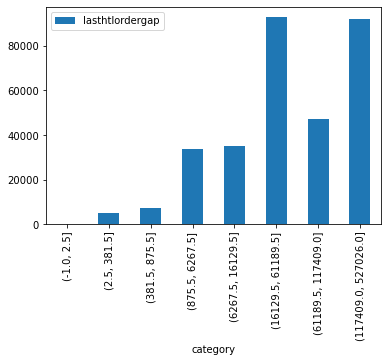

In [199]:
df=train_data.copy()
df['category'] = pd.cut(train_data['lasthtlordergap'], CP) #labels = ['1','2','3','4','5','6','7','8']

df = df.dropna()
df = df.groupby("category").aggregate({"lasthtlordergap":"count"})

df.plot.bar()

In [200]:
ordergap.IVtable

,Bins,CntRec,CntGood,CntBad,PctRec,PctGood,PctBad,WOE,IV
0,"(-1.001, 2.5]",169527,135342,34185,0.351016,0.386304,0.257786,0.4045,0.0520
1,"(2.5, 381.5]",5155,2420,2735,0.010674,0.006907,0.020624,-1.0939,0.0150
2,"(381.5, 875.5]",7001,3712,3289,0.014496,0.010595,0.024802,-0.8505,0.0121
3,"(875.5, 6267.5]",33918,19459,14459,0.070229,0.055541,0.109034,-0.6745,0.0361
4,"(6267.5, 16129.5]",35060,21744,13316,0.072594,0.062063,0.100415,-0.4812,0.0185
5,"(16129.5, 61189.5]",92995,63361,29634,0.192552,0.180850,0.223467,-0.2116,0.0090
6,"(61189.5, 117409.0]",47010,33992,13018,0.097337,0.097023,0.098168,-0.0117,0.0000
7,"(117409.0, 527026.0]",92295,70321,21974,0.191102,0.200716,0.165704,0.1917,0.0067
8,Total,482961,350351,132610,1.000000,1.000000,1.000000,NaN,0.1494


In [201]:
ordergap.IV

0.14939999999999998

In [202]:
iv_all = iv_all.append(pd.Series({'lasthtlordergap':ordergap.IV}))
iv_all

lasthtlordergap    0.1494
dtype: float64

**cityorders (8 bins)**

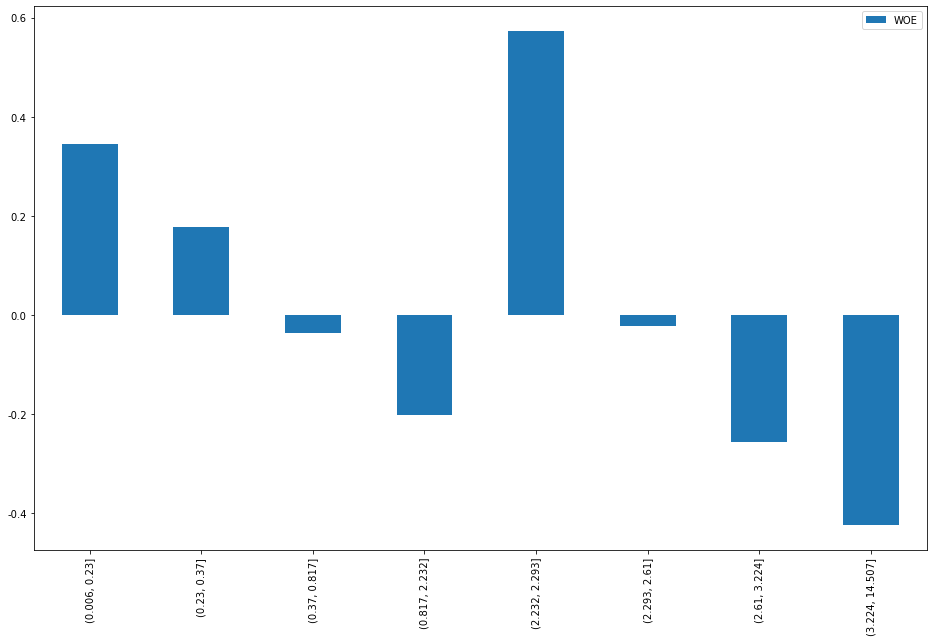

In [203]:
cityorders = smbin(train_data,y,'cityorders',max_bin=8)

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np
import pandas as pd

df=train_data
x= 'cityorders'
y=y
max_bin = 8
p=0.01
plot=True

# specify X and Y variables, exclude NAs
X = np.array(df[x][df[x].notna()]).reshape(-1,1)
Y = df[y][df[x].notna()]
# adjust parameters, get best leaf's sample percentage
gini_impure = np.linspace(0,0.001,50)
param_grid = {"min_impurity_decrease":gini_impure}
Es = GridSearchCV(DecisionTreeClassifier(),param_grid,cv=5)
Es.fit(X,Y)
# use best param build tree model
ES = DecisionTreeClassifier(min_impurity_decrease = Es.best_params_["min_impurity_decrease"],
                                max_leaf_nodes = max_bin,
                                min_samples_leaf = p)    
ES.fit(X,Y)
# output tree structure
TS = tree_structure(ES,x)
# extract threshold of test node.
TH = ES.tree_.threshold[ES.tree_.children_left != ES.tree_.children_right]
# calculate cutpoints
CP = np.append(TH,np.array([X.max(),X.min()]))
CP.sort()
# use customized binning function
#smbin_cust = smbin_cu(df,y,x,cutpoints = CP,plot = plot)    
#out_a = pd.Series({"Tree_structure":TS})
#out = smbin_cust.append(out_a)


<AxesSubplot:xlabel='category'>

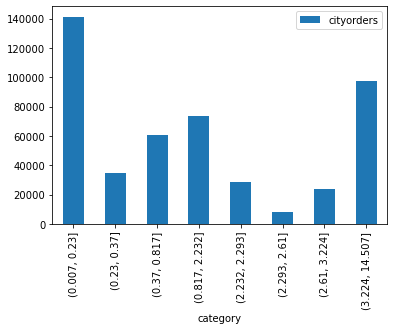

In [204]:
df=train_data.copy()
df['category'] = pd.cut(train_data['cityorders'], CP) #labels = ['1','2','3','4','5','6','7','8']

df = df.dropna()
df = df.groupby("category").aggregate({"cityorders":"count"})

df.plot.bar()

In [205]:
cityorders.IVtable

,Bins,CntRec,CntGood,CntBad,PctRec,PctGood,PctBad,WOE,IV
0,"(0.006, 0.23]",155712,122816,32896,0.322411,0.350551,0.248066,0.3458,0.0354
1,"(0.23, 0.37]",34869,26474,8395,0.072198,0.075564,0.063306,0.1770,0.0022
2,"(0.37, 0.817]",60771,43642,17129,0.125830,0.124567,0.129168,-0.0363,0.0002
3,"(0.817, 2.232]",73387,50139,23248,0.151952,0.143111,0.175311,-0.2029,0.0065
4,"(2.232, 2.293]",28382,23390,4992,0.058767,0.066762,0.037644,0.5729,0.0167
5,"(2.293, 2.61]",8307,5988,2319,0.017200,0.017091,0.017487,-0.0229,0.0000
6,"(2.61, 3.224]",24021,16128,7893,0.049737,0.046034,0.059520,-0.2569,0.0035
7,"(3.224, 14.507]",97512,61774,35738,0.201905,0.176320,0.269497,-0.4243,0.0395
8,Total,482961,350351,132610,1.000000,1.000000,1.000000,NaN,0.1040


In [206]:
iv_all = iv_all.append(pd.Series({'cityorders':cityorders.IV}))
iv_all

lasthtlordergap    0.1494
cityorders         0.1040
dtype: float64

**lastpvgap (10 bins)**

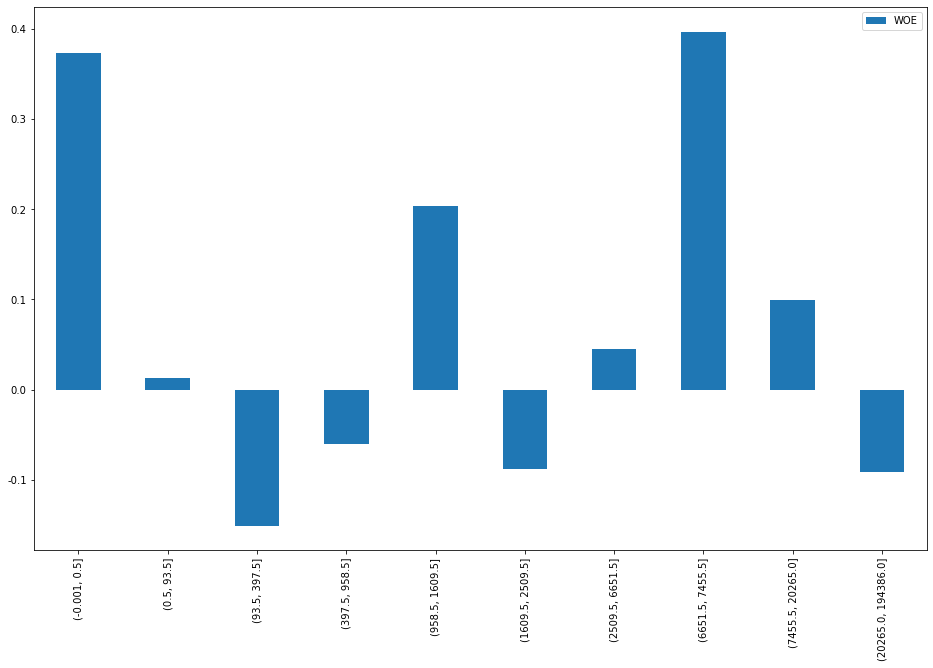

In [207]:
lastpvgap = smbin(train_data,y,'lastpvgap',max_bin=10)

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np
import pandas as pd

df=train_data
x= 'lastpvgap'
y=y
max_bin = 8
p=0.01
plot=True

# specify X and Y variables, exclude NAs
X = np.array(df[x][df[x].notna()]).reshape(-1,1)
Y = df[y][df[x].notna()]
# adjust parameters, get best leaf's sample percentage
gini_impure = np.linspace(0,0.001,50)
param_grid = {"min_impurity_decrease":gini_impure}
Es = GridSearchCV(DecisionTreeClassifier(),param_grid,cv=5)
Es.fit(X,Y)
ES = DecisionTreeClassifier(min_impurity_decrease = Es.best_params_["min_impurity_decrease"],
                                max_leaf_nodes = max_bin,
                                min_samples_leaf = p)    
ES.fit(X,Y)
# output tree structure
TS = tree_structure(ES,x)
# extract threshold of test node
TH = ES.tree_.threshold[ES.tree_.children_left != ES.tree_.children_right]
# calculate cutpoints
CP = np.append(TH,np.array([X.max(),X.min()]))
CP.sort()
# use customized binning function
#smbin_cust = smbin_cu(df,y,x,cutpoints = CP,plot = plot)    
#out_a = pd.Series({"Tree_structure":TS})
#out = smbin_cust.append(out_a)


<AxesSubplot:xlabel='category'>

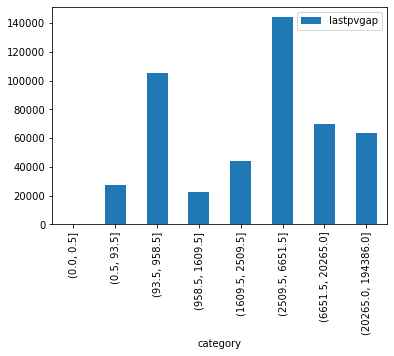

In [208]:
df=train_data.copy()
df['category'] = pd.cut(train_data['lastpvgap'], CP) #labels = ['1','2','3','4','5','6','7','8']

df = df.dropna()
df = df.groupby("category").aggregate({"lastpvgap":"count"})

df.plot.bar()

In [209]:
lastpvgap.IVtable

,Bins,CntRec,CntGood,CntBad,PctRec,PctGood,PctBad,WOE,IV
0,"(-0.001, 0.5]",5607,4448,1159,0.011610,0.012696,0.008740,0.3734,0.0015
1,"(0.5, 93.5]",27607,20098,7509,0.057162,0.057365,0.056625,0.0130,0.0000
2,"(93.5, 397.5]",52634,36549,16085,0.108982,0.104321,0.121296,-0.1508,0.0026
3,"(397.5, 958.5]",52763,37638,15125,0.109249,0.107429,0.114056,-0.0599,0.0004
4,"(958.5, 1609.5]",22547,17228,5319,0.046685,0.049174,0.040110,0.2037,0.0018
5,"(1609.5, 2509.5]",44279,31331,12948,0.091682,0.089427,0.097640,-0.0879,0.0007
6,"(2509.5, 6651.5]",144104,105821,38283,0.298376,0.302043,0.288689,0.0452,0.0006
7,"(6651.5, 7455.5]",5545,4420,1125,0.011481,0.012616,0.008484,0.3968,0.0016
8,"(7455.5, 20265.0]",64066,47711,16355,0.132653,0.136181,0.123332,0.0991,0.0013
9,"(20265.0, 194386.0]",63809,45107,18702,0.132120,0.128748,0.141030,-0.0911,0.0011


In [210]:
iv_all = iv_all.append(pd.Series({'lastpvgap':lastpvgap.IV}))
iv_all

lasthtlordergap    0.1494
cityorders         0.1040
lastpvgap          0.0116
dtype: float64

**cr (8 bins)**

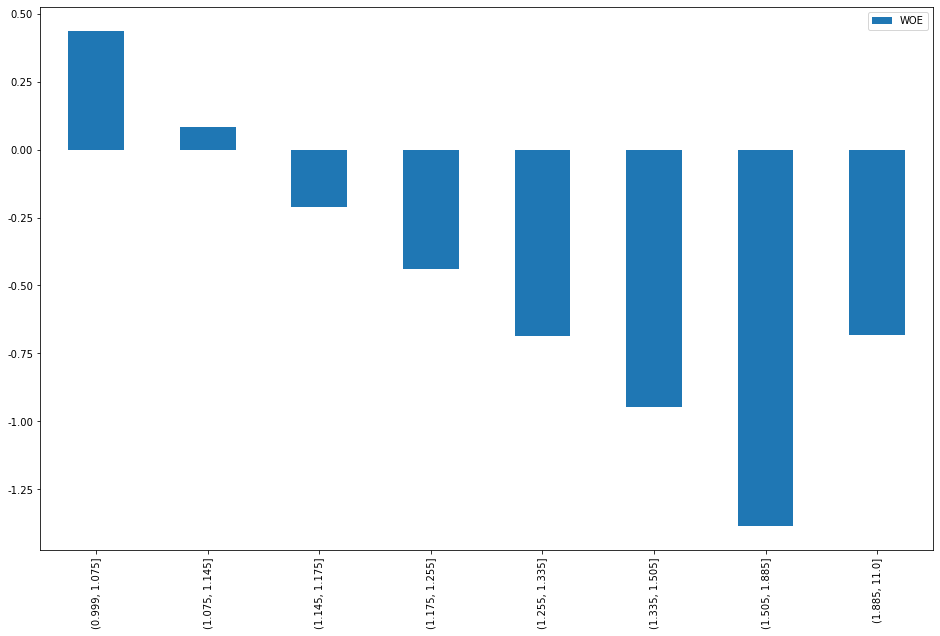

In [211]:
cr = smbin(train_data,y,'cr',max_bin =8)

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np
import pandas as pd

df=train_data
x= 'cr'
y=y
max_bin = 8
p=0.01
plot=True

# specify X and Y variables, exclude NAs
X = np.array(df[x][df[x].notna()]).reshape(-1,1)
Y = df[y][df[x].notna()]
# adjust parameters, get best leaf's sample percentage
gini_impure = np.linspace(0,0.001,50)
param_grid = {"min_impurity_decrease":gini_impure}
Es = GridSearchCV(DecisionTreeClassifier(),param_grid,cv=5)
Es.fit(X,Y)
# use best param build tree model
ES = DecisionTreeClassifier(min_impurity_decrease = Es.best_params_["min_impurity_decrease"],
                                max_leaf_nodes = max_bin,
                                min_samples_leaf = p)    
ES.fit(X,Y)
# output tree structure
TS = tree_structure(ES,x)
# extract threshold of test node
TH = ES.tree_.threshold[ES.tree_.children_left != ES.tree_.children_right]
# calculate cutpoints
CP = np.append(TH,np.array([X.max(),X.min()]))
CP.sort()
# use customized binning function
#smbin_cust = smbin_cu(df,y,x,cutpoints = CP,plot = plot)    
#out_a = pd.Series({"Tree_structure":TS})
#out = smbin_cust.append(out_a)


<AxesSubplot:xlabel='category'>

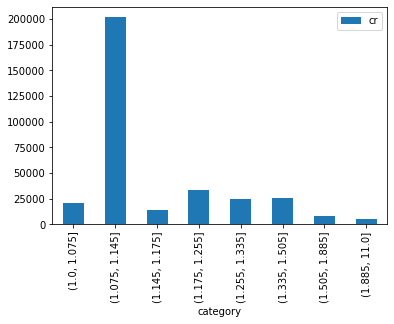

In [212]:
df=train_data.copy()
df['category'] = pd.cut(train_data['cr'], CP) #labels = ['1','2','3','4','5','6','7','8']

df = df.dropna()
df = df.groupby("category").aggregate({"cr":"count"})

df.plot.bar()

In [213]:
cr.IVtable

,Bins,CntRec,CntGood,CntBad,PctRec,PctGood,PctBad,WOE,IV
0,"(0.999, 1.075]",170963,137328,33635,0.353989,0.391973,0.253638,0.4353,0.0602
1,"(1.075, 1.145]",201729,149589,52140,0.417692,0.426969,0.393183,0.0824,0.0028
2,"(1.145, 1.175]",13601,9272,4329,0.028162,0.026465,0.032645,-0.2099,0.0013
3,"(1.175, 1.255]",33789,21296,12493,0.069962,0.060785,0.094209,-0.4382,0.0146
4,"(1.255, 1.335]",24505,13995,10510,0.050739,0.039946,0.079255,-0.6852,0.0269
5,"(1.335, 1.505]",25213,12761,12452,0.052205,0.036423,0.093899,-0.9470,0.0544
6,"(1.505, 1.885]",8154,3247,4907,0.016883,0.009268,0.037003,-1.3845,0.0384
7,"(1.885, 11.0]",5007,2863,2144,0.010367,0.008172,0.016168,-0.6823,0.0055
8,Total,482961,350351,132610,1.000000,1.000000,1.000000,NaN,0.2041


In [214]:
iv_all = iv_all.append(pd.Series({'cr':cr.IV}))
iv_all

lasthtlordergap    0.1494
cityorders         0.1040
lastpvgap          0.0116
cr                 0.2041
dtype: float64

**sid (10 bins)**

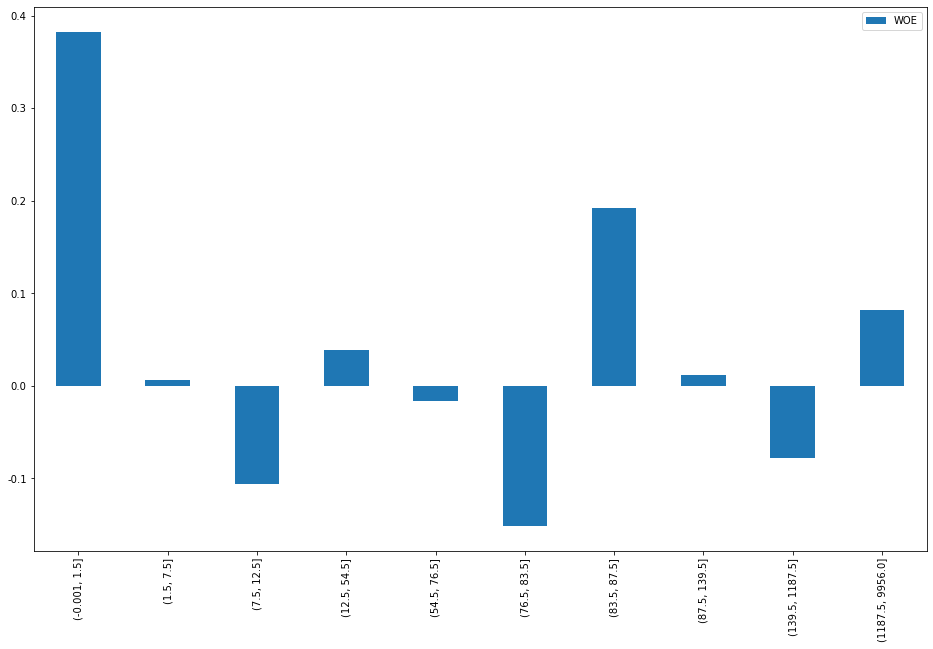

In [215]:
sid  =smbin(train_data,y,'sid',max_bin=10)

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np
import pandas as pd

df=train_data
x= 'sid'
y=y
max_bin = 8
p=0.01
plot=True

# specify X and Y variables, exclude NAs
X = np.array(df[x][df[x].notna()]).reshape(-1,1)
Y = df[y][df[x].notna()]
# adjust parameters, get best leaf's sample percentage
gini_impure = np.linspace(0,0.001,50)
param_grid = {"min_impurity_decrease":gini_impure}
Es = GridSearchCV(DecisionTreeClassifier(),param_grid,cv=5)
Es.fit(X,Y)
# use best param build tree model
ES = DecisionTreeClassifier(min_impurity_decrease = Es.best_params_["min_impurity_decrease"],
                                max_leaf_nodes = max_bin,
                                min_samples_leaf = p)    
ES.fit(X,Y)
# output tree structure
TS = tree_structure(ES,x)
# extract threshold of test node
TH = ES.tree_.threshold[ES.tree_.children_left != ES.tree_.children_right]
# calculate cutpoints
CP = np.append(TH,np.array([X.max(),X.min()]))
CP.sort()
# use customized binning function
#smbin_cust = smbin_cu(df,y,x,cutpoints = CP,plot = plot)    
#out_a = pd.Series({"Tree_structure":TS})
#out = smbin_cust.append(out_a)

<AxesSubplot:xlabel='category'>

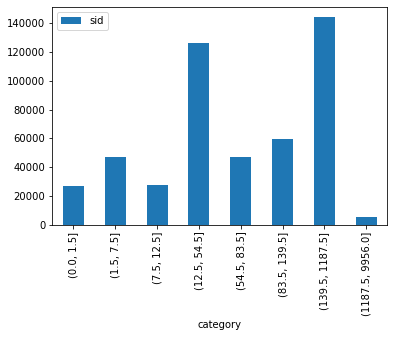

In [216]:
df=train_data.copy()
df['category'] = pd.cut(train_data['sid'], CP) #labels = ['1','2','3','4','5','6','7','8']

df = df.dropna()
df = df.groupby("category").aggregate({"sid":"count"})

df.plot.bar()

In [217]:
sid.IVtable

,Bins,CntRec,CntGood,CntBad,PctRec,PctGood,PctBad,WOE,IV
0,"(-0.001, 1.5]",27020,21476,5544,0.055947,0.061299,0.041807,0.3827,0.0075
1,"(1.5, 7.5]",46720,33955,12765,0.096737,0.096917,0.096260,0.0068,0.0000
2,"(7.5, 12.5]",27650,19460,8190,0.057251,0.055544,0.061760,-0.1061,0.0007
3,"(12.5, 54.5]",126194,92497,33697,0.261292,0.264012,0.254106,0.0382,0.0004
4,"(54.5, 76.5]",37247,26898,10349,0.077122,0.076774,0.078041,-0.0164,0.0000
5,"(76.5, 83.5]",9623,6681,2942,0.019925,0.019069,0.022185,-0.1513,0.0005
6,"(83.5, 87.5]",5020,3825,1195,0.010394,0.010918,0.009011,0.1919,0.0004
7,"(87.5, 139.5]",54347,39551,14796,0.112529,0.112890,0.111575,0.0117,0.0000
8,"(139.5, 1187.5]",144092,102265,41827,0.298351,0.291893,0.315414,-0.0775,0.0018
9,"(1187.5, 9956.0]",5048,3743,1305,0.010452,0.010684,0.009841,0.0822,0.0001


In [218]:
iv_all = iv_all.append(pd.Series({'sid':sid.IV}))
iv_all

lasthtlordergap    0.1494
cityorders         0.1040
lastpvgap          0.0116
cr                 0.2041
sid                0.0114
dtype: float64

**visitnum_oneyear (7 bins)**

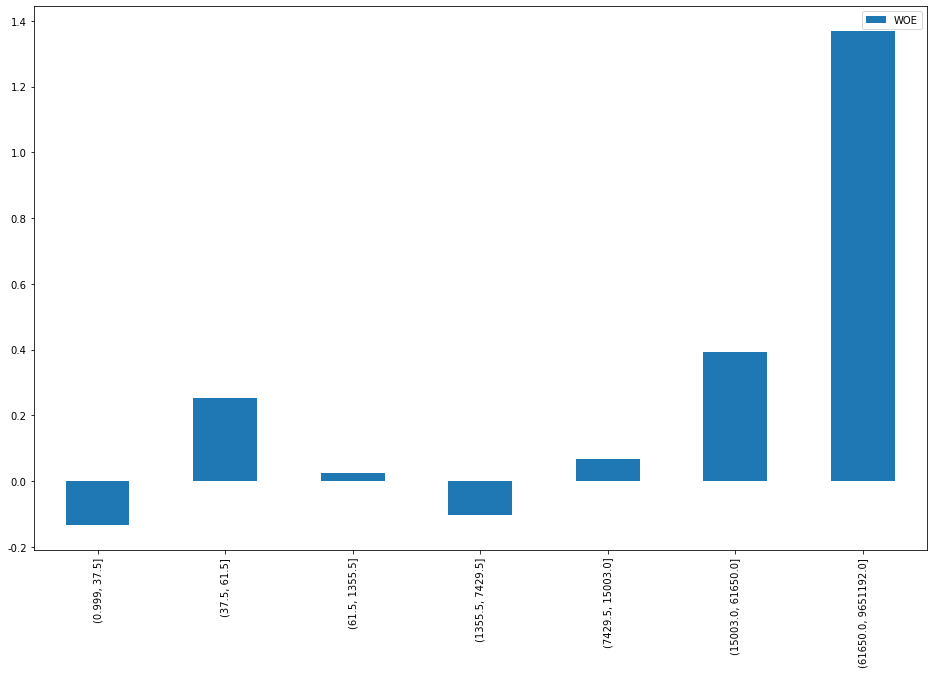

In [219]:
visitnum = smbin(train_data,y,'visitnum_oneyear',max_bin=7)

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np
import pandas as pd

df=train_data
x= 'visitnum_oneyear'
y=y
max_bin = 8
p=0.01
plot=True

# specify X and Y variables, exclude NAs
X = np.array(df[x][df[x].notna()]).reshape(-1,1)
Y = df[y][df[x].notna()]
# adjust parameters, get best leaf's sample percentage
gini_impure = np.linspace(0,0.001,50)
param_grid = {"min_impurity_decrease":gini_impure}
Es = GridSearchCV(DecisionTreeClassifier(),param_grid,cv=5)
Es.fit(X,Y)
# use best param build tree model
ES = DecisionTreeClassifier(min_impurity_decrease = Es.best_params_["min_impurity_decrease"],
                                max_leaf_nodes = max_bin,
                                min_samples_leaf = p)    
ES.fit(X,Y)
# output tree structure
TS = tree_structure(ES,x)
# extract threshold of test node
TH = ES.tree_.threshold[ES.tree_.children_left != ES.tree_.children_right]
# calculate cutpoints
CP = np.append(TH,np.array([X.max(),X.min()]))
CP.sort()
# use customized binning function
#smbin_cust = smbin_cu(df,y,x,cutpoints = CP,plot = plot)    
#out_a = pd.Series({"Tree_structure":TS})
#out = smbin_cust.append(out_a)

<AxesSubplot:xlabel='category'>

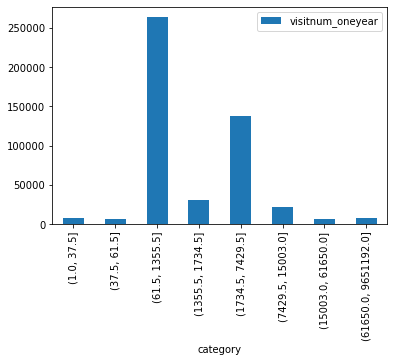

In [220]:
df=train_data.copy()
df['category'] = pd.cut(train_data['visitnum_oneyear'], CP) #labels = ['1','2','3','4','5','6','7','8']

df = df.dropna()
df = df.groupby("category").aggregate({"visitnum_oneyear":"count"})

df.plot.bar()

In [221]:
visitnum.IVtable

,Bins,CntRec,CntGood,CntBad,PctRec,PctGood,PctBad,WOE,IV
0,"(0.999, 37.5]",8510,5939,2571,0.017620,0.016952,0.019388,-0.1343,0.0003
1,"(37.5, 61.5]",6778,5238,1540,0.014034,0.014951,0.011613,0.2526,0.0008
2,"(61.5, 1355.5]",263787,192601,71186,0.546187,0.549737,0.536807,0.0238,0.0003
3,"(1355.5, 7429.5]",168454,118718,49736,0.348794,0.338854,0.375055,-0.1015,0.0037
4,"(7429.5, 15003.0]",21398,15807,5591,0.044306,0.045118,0.042161,0.0678,0.0002
5,"(15003.0, 61650.0]",6507,5182,1325,0.013473,0.014791,0.009992,0.3923,0.0019
6,"(61650.0, 9651192.0]",7527,6866,661,0.015585,0.019597,0.004985,1.3691,0.0200
7,Total,482961,350351,132610,1.000000,1.000000,1.000000,NaN,0.0272


In [222]:
iv_all = iv_all.append(pd.Series({'visitnum':visitnum.IV}))
iv_all

lasthtlordergap    0.1494
cityorders         0.1040
lastpvgap          0.0116
cr                 0.2041
sid                0.0114
visitnum           0.0272
dtype: float64

**h (8 bins)**

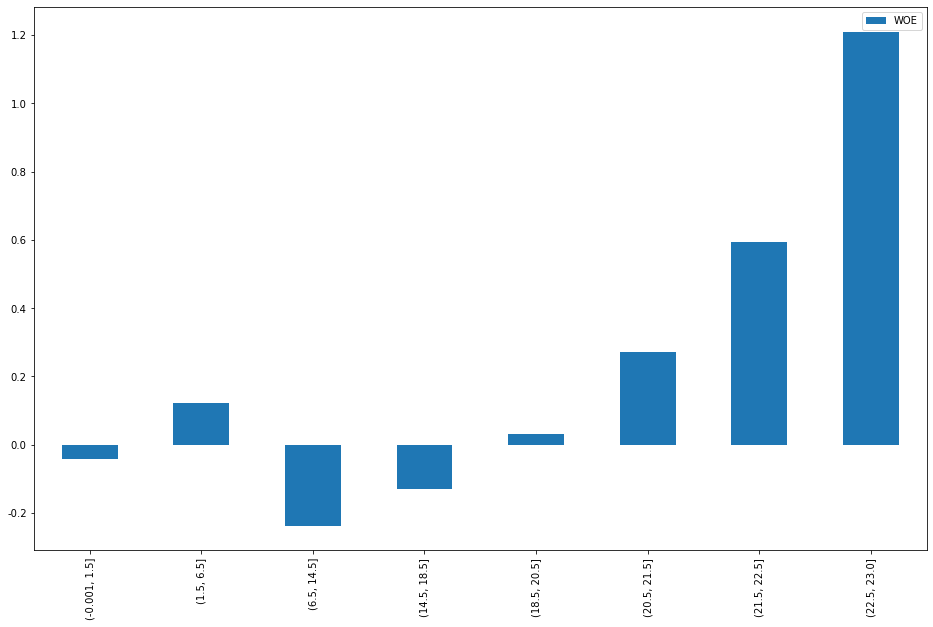

In [223]:
h = smbin(train_data,y,'h',max_bin=8)

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np
import pandas as pd

df=train_data
x= 'h'
y=y
max_bin = 8
p=0.01
plot=True

# specify X and Y variables, exclude NAs
X = np.array(df[x][df[x].notna()]).reshape(-1,1)
Y = df[y][df[x].notna()]
# adjust parameters, get best leaf's sample percentage
gini_impure = np.linspace(0,0.001,50)
param_grid = {"min_impurity_decrease":gini_impure}
Es = GridSearchCV(DecisionTreeClassifier(),param_grid,cv=5)
Es.fit(X,Y)
# use best param build tree model
ES = DecisionTreeClassifier(min_impurity_decrease = Es.best_params_["min_impurity_decrease"],
                                max_leaf_nodes = max_bin,
                                min_samples_leaf = p)    
ES.fit(X,Y)
# output tree structure
TS = tree_structure(ES,x)
# extract threshold of test node
TH = ES.tree_.threshold[ES.tree_.children_left != ES.tree_.children_right]
# calculate cutpoints
CP = np.append(TH,np.array([X.max(),X.min()]))
CP.sort()
# use customized binning function
#smbin_cust = smbin_cu(df,y,x,cutpoints = CP,plot = plot)    
#out_a = pd.Series({"Tree_structure":TS})
#out = smbin_cust.append(out_a)

<AxesSubplot:xlabel='category'>

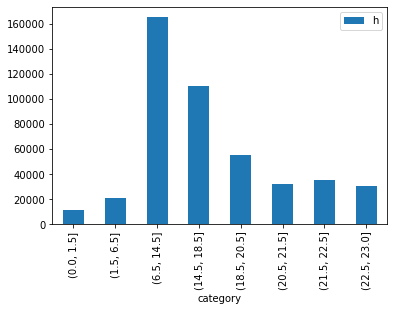

In [224]:
df=train_data.copy()
df['category'] = pd.cut(train_data['h'], CP) #labels = ['1','2','3','4','5','6','7','8']

df = df.dropna()
df = df.groupby("category").aggregate({"h":"count"})

df.plot.bar()

In [225]:
h.IVtable

,Bins,CntRec,CntGood,CntBad,PctRec,PctGood,PctBad,WOE,IV
0,"(-0.001, 1.5]",33092,23736,9356,0.068519,0.067749,0.070553,-0.0405,0.0001
1,"(1.5, 6.5]",20852,15616,5236,0.043175,0.044572,0.039484,0.1212,0.0006
2,"(6.5, 14.5]",165288,111703,53585,0.342239,0.318832,0.404080,-0.2369,0.0202
3,"(14.5, 18.5]",110082,76955,33127,0.227931,0.219651,0.249808,-0.1287,0.0039
4,"(18.5, 20.5]",55333,40472,14861,0.114570,0.115518,0.112065,0.0303,0.0001
5,"(20.5, 21.5]",32239,25028,7211,0.066753,0.071437,0.054377,0.2729,0.0047
6,"(21.5, 22.5]",35371,29251,6120,0.073238,0.083491,0.046150,0.5928,0.0221
7,"(22.5, 23.0]",30704,27590,3114,0.063574,0.078750,0.023482,1.2100,0.0669
8,Total,482961,350351,132610,1.000000,1.000000,1.000000,NaN,0.1186


In [226]:
iv_all = iv_all.append(pd.Series({'h':h.IV}))
iv_all

lasthtlordergap    0.1494
cityorders         0.1040
lastpvgap          0.0116
cr                 0.2041
sid                0.0114
visitnum           0.0272
h                  0.1186
dtype: float64

**Remove Variables with IV < 0.02**

In [227]:
bin_list = [ordergap,cityorders,cr,visitnum,h]

<AxesSubplot:>

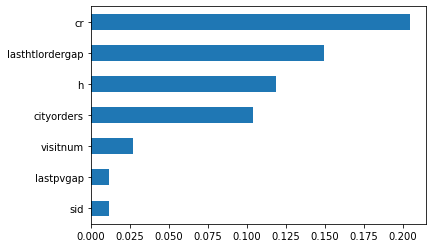

In [228]:
iv_all.sort_values().plot(kind='barh')

In [229]:
out = iv_all.sort_values(ascending=False).index[:-3:-1]
out

Index(['sid', 'lastpvgap'], dtype='object')

In [230]:
iv_list = iv_all.drop(index=out)

## Data Modeling

In [231]:
features_02 =  {'lasthtlordergap':'Time gap since last order within one year'
             ,'cityorders':'Number of orders submitted yesterday in current city within the date of arrival'
            ,'cr':'Conversion Rate','visitnum_oneyear':'Annual Visits','h':'Time of Visit'}

In [232]:
train_data.head()

,lasthtlordergap,cityorders,lastpvgap,cr,sid,visitnum_oneyear,h,label
0,713.0,0.680,312.0,1.14,111.0,2162.0,18.0,1
1,97890.0,0.027,3594.0,1.00,54.0,1397.0,22.0,1
2,4601.0,0.813,299.0,1.07,385.0,2881.0,15.0,1
3,-1.0,3.033,1273.0,1.00,37.0,1218.0,15.0,1
4,52076.0,0.013,31216.0,2.00,61.0,318.0,5.0,1


In [233]:
test_data.head()

,lasthtlordergap,cityorders,lastpvgap,cr,sid,visitnum_oneyear,h,label
0,218111.0,0.107,179.0,1.000000,530,3415.0,6,1
1,-1.0,9.160,35.0,1.000000,7,649.0,8,0
2,19564.0,8.467,1725.0,1.050000,73,2979.0,12,1
3,-1.0,6.960,250.0,1.136717,43,366.0,1,1
4,-1.0,0.060,27344.0,1.136717,11,507.0,1,1


In [234]:
train_data_ = train_data.drop(columns=out,axis=1)
test_data_ = test_data.drop(columns=out,axis=1)

In [235]:
train_data_.head()
test_data_.head()

,lasthtlordergap,cityorders,cr,visitnum_oneyear,h,label
0,218111.0,0.107,1.000000,3415.0,6,1
1,-1.0,9.160,1.000000,649.0,8,0
2,19564.0,8.467,1.050000,2979.0,12,1
3,-1.0,6.960,1.136717,366.0,1,1
4,-1.0,0.060,1.136717,507.0,1,1


In [236]:
data_woe = smgen(train_data_,bin_list)
data_woe.head()

,lasthtlordergap,cityorders,cr,visitnum_oneyear,h,label,lasthtlordergap_woe,cityorders_woe,cr_woe,visitnum_oneyear_woe,h_woe
0,713.0,0.680,1.14,2162.0,18.0,1,-0.8505,-0.0363,0.0824,-0.1015,-0.1287
1,97890.0,0.027,1.00,1397.0,22.0,1,-0.0117,0.3458,0.4353,-0.1015,0.5928
2,4601.0,0.813,1.07,2881.0,15.0,1,-0.6745,-0.0363,0.4353,-0.1015,-0.1287
3,-1.0,3.033,1.00,1218.0,15.0,1,0.4045,-0.2569,0.4353,0.0238,-0.1287
4,52076.0,0.013,2.00,318.0,5.0,1,-0.2116,0.3458,-0.6823,0.0238,0.1212


In [237]:
data_woe2 = smgen(test_data_,bin_list)
data_woe2.head()

,lasthtlordergap,cityorders,cr,visitnum_oneyear,h,label,lasthtlordergap_woe,cityorders_woe,cr_woe,visitnum_oneyear_woe,h_woe
0,218111.0,0.107,1.000000,3415.0,6,1,-0.8505,-0.0363,0.0824,-0.1015,-0.1287
1,-1.0,9.160,1.000000,649.0,8,0,-0.0117,0.3458,0.4353,-0.1015,0.5928
2,19564.0,8.467,1.050000,2979.0,12,1,-0.6745,-0.0363,0.4353,-0.1015,-0.1287
3,-1.0,6.960,1.136717,366.0,1,1,0.4045,-0.2569,0.4353,0.0238,-0.1287
4,-1.0,0.060,1.136717,507.0,1,1,-0.2116,0.3458,-0.6823,0.0238,0.1212


In [238]:
X_train = data_woe.iloc[:,-len(bin_list):]
X_test = data_woe2.iloc[:,-len(bin_list):]
X_train.head()
X_test.head()

,lasthtlordergap_woe,cityorders_woe,cr_woe,visitnum_oneyear_woe,h_woe
0,-0.8505,-0.0363,0.0824,-0.1015,-0.1287
1,-0.0117,0.3458,0.4353,-0.1015,0.5928
2,-0.6745,-0.0363,0.4353,-0.1015,-0.1287
3,0.4045,-0.2569,0.4353,0.0238,-0.1287
4,-0.2116,0.3458,-0.6823,0.0238,0.1212


In [239]:
Y_train = data_woe[y]
Y_train
Y_test = data_woe2[y]
Y_test

0         1
1         0
2         1
3         1
4         1
         ..
206979    1
206980    1
206981    0
206982    1
206983    0
Name: label, Length: 206984, dtype: int64

In [240]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression().fit(X_train,Y_train)

In [241]:
LR = LogisticRegression().fit(X_train,Y_train)

In [242]:
LR.score(X_train,Y_train)

0.7351359633593603

In [243]:
LR.coef_

array([[0.46932328, 0.88074094, 0.72797477, 0.75911663, 0.96971312]])

In [244]:
Xtest_new

,d,arrival,lasthtlordergap,cityorders,lastpvgap,cr,sid,visitnum_oneyear,h
0,2016-05-20,2016-05-21,218111.0,0.107,179.0,1.000000,530,3415.0,6
1,2016-05-15,2016-05-15,-1.0,9.160,35.0,1.000000,7,649.0,8
2,2016-05-15,2016-05-15,19564.0,8.467,1725.0,1.050000,73,2979.0,12
3,2016-05-20,2016-05-20,-1.0,6.960,250.0,1.136717,43,366.0,1
4,2016-05-20,2016-06-07,-1.0,0.060,27344.0,1.136717,11,507.0,1
...,...,...,...,...,...,...,...,...,...
206979,2016-05-16,2016-05-28,-1.0,0.007,237.0,1.000000,25,914.0,17
206980,2016-05-15,2016-05-15,9379.0,0.067,1089.0,1.030000,459,3981.0,6
206981,2016-05-19,2016-06-09,27747.0,0.547,640.0,1.136717,240,2624.0,17
206982,2016-05-19,2016-05-22,35.0,0.107,28.0,2.000000,37,314.0,22


In [245]:
X_train

,lasthtlordergap_woe,cityorders_woe,cr_woe,visitnum_oneyear_woe,h_woe
0,-0.8505,-0.0363,0.0824,-0.1015,-0.1287
1,-0.0117,0.3458,0.4353,-0.1015,0.5928
2,-0.6745,-0.0363,0.4353,-0.1015,-0.1287
3,0.4045,-0.2569,0.4353,0.0238,-0.1287
4,-0.2116,0.3458,-0.6823,0.0238,0.1212
...,...,...,...,...,...
482956,-0.6745,-0.2029,-0.9470,0.0238,-0.2369
482957,0.1917,0.3458,0.0824,0.0238,1.2100
482958,0.4045,0.3458,0.0824,-0.1015,0.1212
482959,0.4045,0.5729,0.0824,0.0238,0.2729


In [246]:
X_test

,lasthtlordergap_woe,cityorders_woe,cr_woe,visitnum_oneyear_woe,h_woe
0,-0.8505,-0.0363,0.0824,-0.1015,-0.1287
1,-0.0117,0.3458,0.4353,-0.1015,0.5928
2,-0.6745,-0.0363,0.4353,-0.1015,-0.1287
3,0.4045,-0.2569,0.4353,0.0238,-0.1287
4,-0.2116,0.3458,-0.6823,0.0238,0.1212
...,...,...,...,...,...
206979,-0.2116,-0.2029,0.4353,0.0238,-0.2369
206980,0.4045,-0.4243,0.0824,0.0238,0.1212
206981,-0.2116,0.3458,0.4353,0.0678,0.0303
206982,-0.4812,0.1770,-0.9470,0.0238,-0.1287


In [247]:
aa = pd.DataFrame({'LR.score(X_train,Y_train)':LR.score(X_train,Y_train),'LR.score(X_test,Y_test)':LR.score(X_test,Y_test)},index=['score'])

bb = pd.DataFrame({'intercept_':LR.intercept_[0]},index=['coef_'])
bb

,intercept_
coef_,0.969301


In [248]:
aa

,"LR.score(X_train,Y_train)","LR.score(X_test,Y_test)"
score,0.735136,0.693058


In [249]:
pd.concat([pd.DataFrame(dict(zip(X_train.columns,LR.coef_[0])),index=['coef_']),bb],axis=1)

,lasthtlordergap_woe,cityorders_woe,cr_woe,visitnum_oneyear_woe,h_woe,intercept_
coef_,0.469323,0.880741,0.727975,0.759117,0.969713,0.969301


In [250]:
pd.DataFrame(dict(zip(X_train.columns,LR.coef_[0])),index=['coef_'])

,lasthtlordergap_woe,cityorders_woe,cr_woe,visitnum_oneyear_woe,h_woe
coef_,0.469323,0.880741,0.727975,0.759117,0.969713


## Model Evaluation

In [251]:
test_data_ = test_data.copy()

In [252]:
test_data = test_data.drop(columns=out,axis=1)

In [253]:
test_woe = smgennew(test_data,bin_list)
test_woe.head()

,lasthtlordergap,cityorders,cr,visitnum_oneyear,h,label,lasthtlordergap_woe,cityorders_woe,cr_woe,visitnum_oneyear_woe,h_woe
0,218111.0,0.107,1.000000,3415.0,6,1,0.1917,0.3458,0.4353,-0.1015,0.1212
1,-1.0,9.160,1.000000,649.0,8,0,0.4045,-0.4243,0.4353,0.0238,-0.2369
2,19564.0,8.467,1.050000,2979.0,12,1,-0.2116,-0.4243,0.4353,-0.1015,-0.2369
3,-1.0,6.960,1.136717,366.0,1,1,0.4045,-0.4243,0.0824,0.0238,-0.0405
4,-1.0,0.060,1.136717,507.0,1,1,0.4045,0.3458,0.0824,0.0238,-0.0405


In [254]:
X_test = test_woe.iloc[:,-len(bin_list):]

In [255]:
X_test

,lasthtlordergap_woe,cityorders_woe,cr_woe,visitnum_oneyear_woe,h_woe
0,0.1917,0.3458,0.4353,-0.1015,0.1212
1,0.4045,-0.4243,0.4353,0.0238,-0.2369
2,-0.2116,-0.4243,0.4353,-0.1015,-0.2369
3,0.4045,-0.4243,0.0824,0.0238,-0.0405
4,0.4045,0.3458,0.0824,0.0238,-0.0405
...,...,...,...,...,...
206979,0.4045,0.3458,0.4353,0.0238,-0.1287
206980,-0.4812,0.3458,0.4353,-0.1015,0.1212
206981,-0.2116,-0.0363,0.0824,-0.1015,-0.1287
206982,-1.0939,0.3458,-0.6823,0.0238,0.5928


In [256]:
Y_test = test_woe.loc[:,y]
Y_test

0         1
1         0
2         1
3         1
4         1
         ..
206979    1
206980    1
206981    0
206982    1
206983    0
Name: label, Length: 206984, dtype: int64

In [257]:
LR.score(X_test,Y_test)

0.7348973833726279

In [258]:
from sklearn.metrics import auc, roc_curve

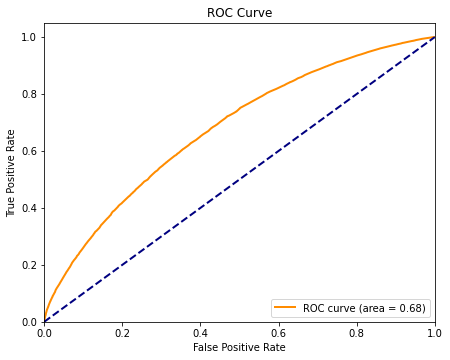

In [259]:
# ROC
y_score = LR.predict_proba(X_test)  # Random Forest
fpr, tpr, thresholds = roc_curve(Y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)
def drawRoc(roc_auc,fpr,tpr):
    plt.subplots(figsize=(7, 5.5))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()
drawRoc(roc_auc, fpr, tpr)

In [260]:
from sklearn.metrics import accuracy_score, auc, confusion_matrix, f1_score, \
    precision_score, recall_score, roc_curve
import prettytable

In [261]:
y_pred = LR.predict(X_test)

In [262]:
y_score = LR.predict_proba(X_test)  # Random Forest
fpr, tpr, thresholds = roc_curve(Y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)
y_pred = LR.predict(X_test)
scores = [round(i(Y_test, y_pred),3 )for  i in (accuracy_score,precision_score,\
                                     recall_score,f1_score)]
scores.insert(0,roc_auc)
core_metrics = prettytable.PrettyTable()  # Create table
core_metrics.field_names = ['auc', 'accuracy', 'precision', 'recall', 'f1']  # Define column names
core_metrics.add_row(scores)  # Add data
print('core metrics\n',core_metrics)

core metrics
 +--------------------+----------+-----------+--------+------+
|        auc         | accuracy | precision | recall |  f1  |
+--------------------+----------+-----------+--------+------+
| 0.6774468724446009 |  0.735   |   0.749   | 0.956  | 0.84 |
+--------------------+----------+-----------+--------+------+


# Feature Creation1

In [263]:
M_train = pd.read_csv('M_train.csv',index_col=0,header=0)

In [264]:
M_test = pd.read_csv('M_test.csv',index_col=0,header=0)

In [265]:
M_train
M_test

,0
0,9050.0
1,-138.0
2,16524.0
3,-350.0
4,-350.0
...,...
206979,-350.0
206980,668.0
206981,4356.0
206982,350.0


In [266]:
train_data.head()

,lasthtlordergap,cityorders,lastpvgap,cr,sid,visitnum_oneyear,h,label
0,713.0,0.680,312.0,1.14,111.0,2162.0,18.0,1
1,97890.0,0.027,3594.0,1.00,54.0,1397.0,22.0,1
2,4601.0,0.813,299.0,1.07,385.0,2881.0,15.0,1
3,-1.0,3.033,1273.0,1.00,37.0,1218.0,15.0,1
4,52076.0,0.013,31216.0,2.00,61.0,318.0,5.0,1


In [267]:
test_data.head()

,lasthtlordergap,cityorders,cr,visitnum_oneyear,h,label
0,218111.0,0.107,1.000000,3415.0,6,1
1,-1.0,9.160,1.000000,649.0,8,0
2,19564.0,8.467,1.050000,2979.0,12,1
3,-1.0,6.960,1.136717,366.0,1,1
4,-1.0,0.060,1.136717,507.0,1,1


In [268]:
train_data_m = pd.concat([train_data,M_train],axis=1)
test_data_m = pd.concat([test_data_,M_test],axis=1)

In [269]:
train_data_m

,lasthtlordergap,cityorders,lastpvgap,cr,sid,visitnum_oneyear,h,label,0
0,713.0,0.680000,312.0,1.140000,111.0,2162.0,18.0,1,2526.0
1,97890.0,0.027000,3594.0,1.000000,54.0,1397.0,22.0,1,6550.0
2,4601.0,0.813000,299.0,1.070000,385.0,2881.0,15.0,1,4235.0
3,-1.0,3.033000,1273.0,1.000000,37.0,1218.0,15.0,1,-350.0
4,52076.0,0.013000,31216.0,2.000000,61.0,318.0,5.0,1,130.0
...,...,...,...,...,...,...,...,...,...
482956,1947.0,2.047000,1852.0,1.500000,6.0,289.0,12.0,1,700.0
482957,484891.0,0.013000,5922.0,1.137801,246.0,558.0,23.0,0,664.0
482958,-1.0,0.113000,2033.0,1.137801,6.0,1772.0,3.0,1,-350.0
482959,-1.0,2.250719,2838.0,1.137801,655.0,1316.0,21.0,1,-284.0


In [270]:
test_data_m

,lasthtlordergap,cityorders,lastpvgap,cr,sid,visitnum_oneyear,h,label,0
0,218111.0,0.107,179.0,1.000000,530,3415.0,6,1,9050.0
1,-1.0,9.160,35.0,1.000000,7,649.0,8,0,-138.0
2,19564.0,8.467,1725.0,1.050000,73,2979.0,12,1,16524.0
3,-1.0,6.960,250.0,1.136717,43,366.0,1,1,-350.0
4,-1.0,0.060,27344.0,1.136717,11,507.0,1,1,-350.0
...,...,...,...,...,...,...,...,...,...
206979,-1.0,0.007,237.0,1.000000,25,914.0,17,1,-350.0
206980,9379.0,0.067,1089.0,1.030000,459,3981.0,6,1,668.0
206981,27747.0,0.547,640.0,1.136717,240,2624.0,17,0,4356.0
206982,35.0,0.107,28.0,2.000000,37,314.0,22,1,350.0


In [271]:
train_data_m.rename(columns = {'0':'M'},inplace=True)
train_data_m
test_data_m.rename(columns = {'0':'M'},inplace=True)
test_data_m

,lasthtlordergap,cityorders,lastpvgap,cr,sid,visitnum_oneyear,h,label,M
0,218111.0,0.107,179.0,1.000000,530,3415.0,6,1,9050.0
1,-1.0,9.160,35.0,1.000000,7,649.0,8,0,-138.0
2,19564.0,8.467,1725.0,1.050000,73,2979.0,12,1,16524.0
3,-1.0,6.960,250.0,1.136717,43,366.0,1,1,-350.0
4,-1.0,0.060,27344.0,1.136717,11,507.0,1,1,-350.0
...,...,...,...,...,...,...,...,...,...
206979,-1.0,0.007,237.0,1.000000,25,914.0,17,1,-350.0
206980,9379.0,0.067,1089.0,1.030000,459,3981.0,6,1,668.0
206981,27747.0,0.547,640.0,1.136717,240,2624.0,17,0,4356.0
206982,35.0,0.107,28.0,2.000000,37,314.0,22,1,350.0


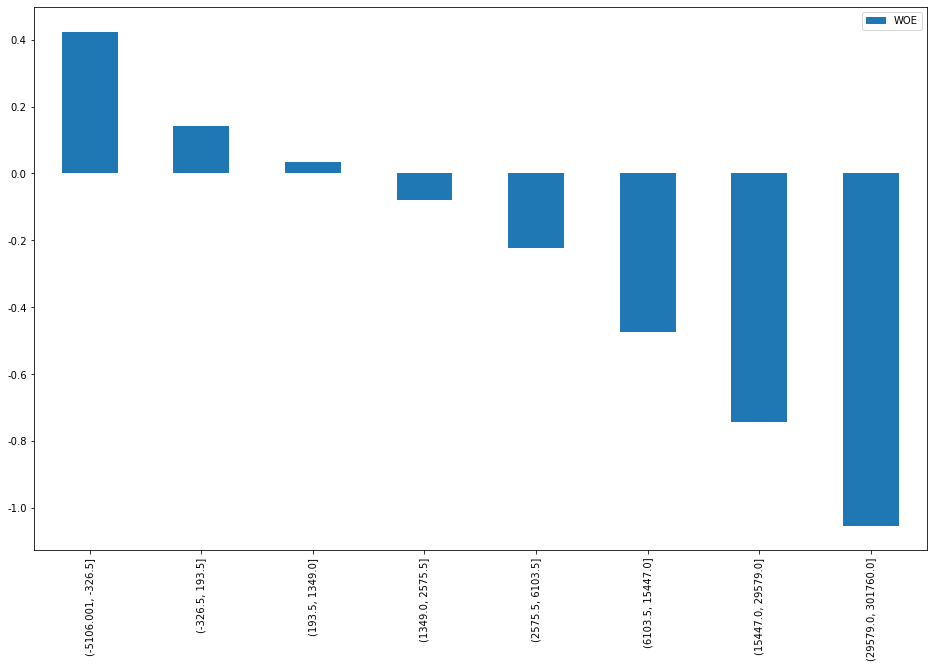

In [272]:
M = smbin(train_data_m,y,'M',max_bin=8)

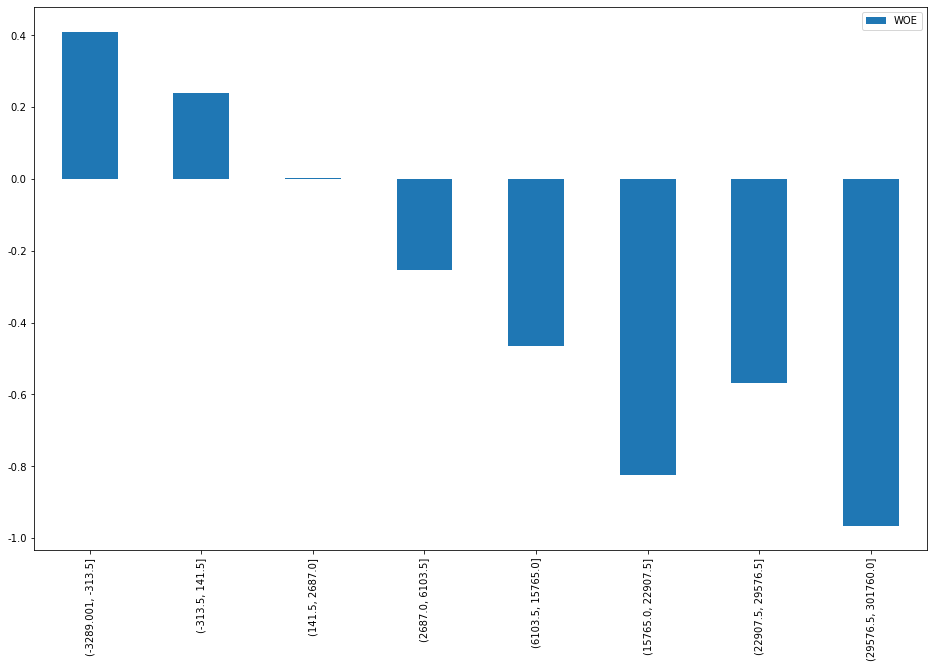

In [273]:
M2 = smbin(test_data_m,y,'M',max_bin=8)

In [274]:
M.IVtable

,Bins,CntRec,CntGood,CntBad,PctRec,PctGood,PctBad,WOE,IV
0,"(-5106.001, -326.5]",158977,127424,31553,0.329172,0.363704,0.237938,0.4243,0.0534
1,"(-326.5, 193.5]",21342,16060,5282,0.044190,0.045840,0.039831,0.1405,0.0008
2,"(193.5, 1349.0]",113579,83129,30450,0.235172,0.237273,0.229621,0.0328,0.0003
3,"(1349.0, 2575.5]",51731,36691,15040,0.107112,0.104726,0.113415,-0.0797,0.0007
4,"(2575.5, 6103.5]",64887,44066,20821,0.134352,0.125777,0.157009,-0.2218,0.0069
5,"(6103.5, 15447.0]",48910,30399,18511,0.101271,0.086767,0.139590,-0.4755,0.0251
6,"(15447.0, 29579.0]",16775,9340,7435,0.034734,0.026659,0.056067,-0.7434,0.0219
7,"(29579.0, 301760.0]",6760,3242,3518,0.013997,0.009254,0.026529,-1.0532,0.0182
8,Total,482961,350351,132610,1.000000,1.000000,1.000000,NaN,0.1273


In [275]:
M2.IVtable

,Bins,CntRec,CntGood,CntBad,PctRec,PctGood,PctBad,WOE,IV
0,"(-3289.001, -313.5]",68320,54630,13690,0.330074,0.363625,0.241246,0.4103,0.0502
1,"(-313.5, 141.5]",6470,4988,1482,0.031258,0.033201,0.026116,0.2400,0.0017
2,"(141.5, 2687.0]",74965,54431,20534,0.362178,0.362301,0.361852,0.0012,0.0000
3,"(2687.0, 6103.5]",26426,17781,8645,0.127672,0.118353,0.152343,-0.2525,0.0086
4,"(6103.5, 15765.0]",21084,13158,7926,0.101863,0.087582,0.139673,-0.4667,0.0243
5,"(15765.0, 22907.5]",4791,2573,2218,0.023147,0.017126,0.039086,-0.8251,0.0181
6,"(22907.5, 29576.5]",2073,1243,830,0.010015,0.008274,0.014626,-0.5698,0.0036
7,"(29576.5, 301760.0]",2855,1433,1422,0.013793,0.009538,0.025059,-0.9659,0.0150
8,Total,206984,150237,56747,1.000000,1.000000,1.000000,NaN,0.1215


In [276]:
iv_all.append(pd.Series({"M":M.IV}))

lasthtlordergap    0.1494
cityorders         0.1040
lastpvgap          0.0116
cr                 0.2041
sid                0.0114
visitnum           0.0272
h                  0.1186
M                  0.1273
dtype: float64

In [277]:
bin_list_m = [ordergap,cityorders,cr,visitnum,h,M]

In [278]:
train_data_m_ = train_data_m.drop(columns=out,axis=1)
test_data_m_ = test_data_m.drop(columns=out,axis=1)

In [279]:
train_data_m_

,lasthtlordergap,cityorders,cr,visitnum_oneyear,h,label,M
0,713.0,0.680000,1.140000,2162.0,18.0,1,2526.0
1,97890.0,0.027000,1.000000,1397.0,22.0,1,6550.0
2,4601.0,0.813000,1.070000,2881.0,15.0,1,4235.0
3,-1.0,3.033000,1.000000,1218.0,15.0,1,-350.0
4,52076.0,0.013000,2.000000,318.0,5.0,1,130.0
...,...,...,...,...,...,...,...
482956,1947.0,2.047000,1.500000,289.0,12.0,1,700.0
482957,484891.0,0.013000,1.137801,558.0,23.0,0,664.0
482958,-1.0,0.113000,1.137801,1772.0,3.0,1,-350.0
482959,-1.0,2.250719,1.137801,1316.0,21.0,1,-284.0


In [280]:
test_data_m_

,lasthtlordergap,cityorders,cr,visitnum_oneyear,h,label,M
0,218111.0,0.107,1.000000,3415.0,6,1,9050.0
1,-1.0,9.160,1.000000,649.0,8,0,-138.0
2,19564.0,8.467,1.050000,2979.0,12,1,16524.0
3,-1.0,6.960,1.136717,366.0,1,1,-350.0
4,-1.0,0.060,1.136717,507.0,1,1,-350.0
...,...,...,...,...,...,...,...
206979,-1.0,0.007,1.000000,914.0,17,1,-350.0
206980,9379.0,0.067,1.030000,3981.0,6,1,668.0
206981,27747.0,0.547,1.136717,2624.0,17,0,4356.0
206982,35.0,0.107,2.000000,314.0,22,1,350.0


In [281]:
data_woe_m = smgen(train_data_m_,bin_list_m)
data_woe_m.head()

,lasthtlordergap,cityorders,cr,visitnum_oneyear,h,label,M,lasthtlordergap_woe,cityorders_woe,cr_woe,visitnum_oneyear_woe,h_woe,M_woe
0,713.0,0.680,1.14,2162.0,18.0,1,2526.0,-0.8505,-0.0363,0.0824,-0.1015,-0.1287,-0.0797
1,97890.0,0.027,1.00,1397.0,22.0,1,6550.0,-0.0117,0.3458,0.4353,-0.1015,0.5928,-0.4755
2,4601.0,0.813,1.07,2881.0,15.0,1,4235.0,-0.6745,-0.0363,0.4353,-0.1015,-0.1287,-0.2218
3,-1.0,3.033,1.00,1218.0,15.0,1,-350.0,0.4045,-0.2569,0.4353,0.0238,-0.1287,0.4243
4,52076.0,0.013,2.00,318.0,5.0,1,130.0,-0.2116,0.3458,-0.6823,0.0238,0.1212,0.1405


In [282]:
X_train_m = data_woe_m.iloc[:,-len(bin_list_m):]
X_train_m.head()

,lasthtlordergap_woe,cityorders_woe,cr_woe,visitnum_oneyear_woe,h_woe,M_woe
0,-0.8505,-0.0363,0.0824,-0.1015,-0.1287,-0.0797
1,-0.0117,0.3458,0.4353,-0.1015,0.5928,-0.4755
2,-0.6745,-0.0363,0.4353,-0.1015,-0.1287,-0.2218
3,0.4045,-0.2569,0.4353,0.0238,-0.1287,0.4243
4,-0.2116,0.3458,-0.6823,0.0238,0.1212,0.1405


In [283]:
LR_m = LogisticRegression().fit(X_train_m,Y_train)

In [284]:
LR_m.score(X_train_m,Y_train)

0.7362457838210539

In [285]:
test_data_m = pd.concat([test_data_,M_test],axis=1)
test_data_m.rename(columns = {'0':'M'},inplace=True)
test_data_m.head()

,lasthtlordergap,cityorders,lastpvgap,cr,sid,visitnum_oneyear,h,label,M
0,218111.0,0.107,179.0,1.000000,530,3415.0,6,1,9050.0
1,-1.0,9.160,35.0,1.000000,7,649.0,8,0,-138.0
2,19564.0,8.467,1725.0,1.050000,73,2979.0,12,1,16524.0
3,-1.0,6.960,250.0,1.136717,43,366.0,1,1,-350.0
4,-1.0,0.060,27344.0,1.136717,11,507.0,1,1,-350.0


In [286]:
test_woe_m = smgennew(test_data_m,bin_list_m)
test_woe_m.head()

,lasthtlordergap,cityorders,lastpvgap,cr,sid,visitnum_oneyear,h,label,M,lasthtlordergap_woe,cityorders_woe,cr_woe,visitnum_oneyear_woe,h_woe,M_woe
0,218111.0,0.107,179.0,1.000000,530,3415.0,6,1,9050.0,0.1917,0.3458,0.4353,-0.1015,0.1212,-0.4755
1,-1.0,9.160,35.0,1.000000,7,649.0,8,0,-138.0,0.4045,-0.4243,0.4353,0.0238,-0.2369,0.1405
2,19564.0,8.467,1725.0,1.050000,73,2979.0,12,1,16524.0,-0.2116,-0.4243,0.4353,-0.1015,-0.2369,-0.7434
3,-1.0,6.960,250.0,1.136717,43,366.0,1,1,-350.0,0.4045,-0.4243,0.0824,0.0238,-0.0405,0.4243
4,-1.0,0.060,27344.0,1.136717,11,507.0,1,1,-350.0,0.4045,0.3458,0.0824,0.0238,-0.0405,0.4243


In [287]:
X_test_m = test_woe_m.iloc[:,-len(bin_list_m):]
X_test_m.head()

,lasthtlordergap_woe,cityorders_woe,cr_woe,visitnum_oneyear_woe,h_woe,M_woe
0,0.1917,0.3458,0.4353,-0.1015,0.1212,-0.4755
1,0.4045,-0.4243,0.4353,0.0238,-0.2369,0.1405
2,-0.2116,-0.4243,0.4353,-0.1015,-0.2369,-0.7434
3,0.4045,-0.4243,0.0824,0.0238,-0.0405,0.4243
4,0.4045,0.3458,0.0824,0.0238,-0.0405,0.4243


In [288]:
Y_test.shape

(206984,)

In [289]:
X_test_m.shape

(206984, 6)

In [290]:
LR_m.score(X_test_m,Y_test)

0.7356703899818343

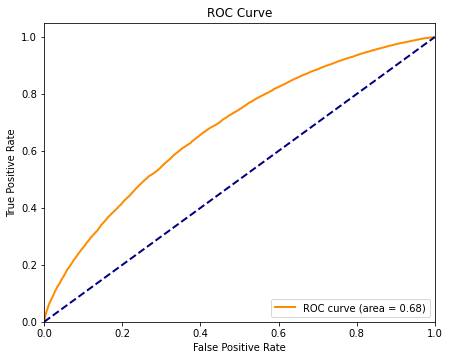

In [291]:
# ROC
y_score_m = LR_m.predict_proba(X_test_m)  # Random Forest
fpr, tpr, thresholds = roc_curve(Y_test, y_score_m[:, 1])
roc_auc = auc(fpr, tpr)
def drawRoc(roc_auc,fpr,tpr):
    plt.subplots(figsize=(7, 5.5))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()
drawRoc(roc_auc, fpr, tpr)

In [292]:
bbb = pd.DataFrame({'intercept_':LR_m.intercept_[0]},index=['coef_'])
bbb

pd.concat([pd.DataFrame(dict(zip(X_train_m.columns,LR_m.coef_[0])),index=['coef_']),bbb],axis=1)

bbb

aaa = pd.DataFrame({'LR.score(X_train,Y_train)':LR_m.score(X_train_m,Y_train),'LR.score(X_test,Y_test)':LR_m.score(X_test_m,Y_test)},index=['score'])

In [293]:
aaa

,"LR.score(X_train,Y_train)","LR.score(X_test,Y_test)"
score,0.736246,0.73567


In [294]:
y_score = LR_m.predict_proba(X_test_m)  # Random Forest
fpr, tpr, thresholds = roc_curve(Y_test, y_score[:, 1])
roc_auc = auc(fpr, tpr)
y_pred = LR_m.predict(X_test_m)
scores = [round(i(Y_test, y_pred),3 )for  i in (accuracy_score,precision_score,\
                                     recall_score,f1_score)]
scores.insert(0,roc_auc)
core_metrics = prettytable.PrettyTable()  # Create Table
core_metrics.field_names = ['auc', 'accuracy', 'precision', 'recall', 'f1']  # Define Column names
core_metrics.add_row(scores)  # Add Data
print('core metrics\n',core_metrics)

core metrics
 +--------------------+----------+-----------+--------+------+
|        auc         | accuracy | precision | recall |  f1  |
+--------------------+----------+-----------+--------+------+
| 0.6790759580191186 |  0.736   |    0.75   | 0.955  | 0.84 |
+--------------------+----------+-----------+--------+------+


# Feature Creation2

In [295]:
import datetime

In [296]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 482961 entries, 512823 to 337794
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   sampleid  482961 non-null  int64 
 1   d         482961 non-null  object
 2   arrival   482961 non-null  object
dtypes: int64(1), object(2)
memory usage: 14.7+ MB


In [297]:
data_train['d'] = pd.to_datetime(data_train['d']) 
data_train['arrival'] = pd.to_datetime(data_train['arrival']) 
data_test['d'] = pd.to_datetime(data_test['d']) 
data_test['arrival'] = pd.to_datetime(data_test['arrival']) 

In [298]:
data_test['delta'] = data_test['arrival'] - data_test['d']
data_train['delta'] = data_train['arrival'] - data_train['d']

In [299]:
data_train['delta'] = data_train['delta'].dt.days
data_test['delta'] = data_test['delta'].dt.days

In [300]:
data_test['delta']

606219     1
118709     0
495882     0
149061     0
183546    18
          ..
529313    12
116108     0
346286    21
608532     3
291547     2
Name: delta, Length: 206984, dtype: int64

In [301]:
data_train['delta']

512823     4
28998      0
175239     0
276529     0
227980     4
          ..
321481     0
303174    18
2878       6
649118     0
337794     3
Name: delta, Length: 482961, dtype: int64

In [302]:
data_train = data_train.reset_index(drop=True)
data_test = data_test.reset_index(drop=True)

In [303]:
def str_date(x):
    out = datetime.datetime.strptime(x,"%Y-%m-%d").date()
    return out

In [304]:
def date_str(x):
    out = int(x)
    return out

In [305]:
str_date('2010-10-9')

datetime.date(2010, 10, 9)

In [306]:
test_data_m

,lasthtlordergap,cityorders,lastpvgap,cr,sid,visitnum_oneyear,h,label,M
0,218111.0,0.107,179.0,1.000000,530,3415.0,6,1,9050.0
1,-1.0,9.160,35.0,1.000000,7,649.0,8,0,-138.0
2,19564.0,8.467,1725.0,1.050000,73,2979.0,12,1,16524.0
3,-1.0,6.960,250.0,1.136717,43,366.0,1,1,-350.0
4,-1.0,0.060,27344.0,1.136717,11,507.0,1,1,-350.0
...,...,...,...,...,...,...,...,...,...
206979,-1.0,0.007,237.0,1.000000,25,914.0,17,1,-350.0
206980,9379.0,0.067,1089.0,1.030000,459,3981.0,6,1,668.0
206981,27747.0,0.547,640.0,1.136717,240,2624.0,17,0,4356.0
206982,35.0,0.107,28.0,2.000000,37,314.0,22,1,350.0


In [307]:
train_data_m

,lasthtlordergap,cityorders,lastpvgap,cr,sid,visitnum_oneyear,h,label,M
0,713.0,0.680000,312.0,1.140000,111.0,2162.0,18.0,1,2526.0
1,97890.0,0.027000,3594.0,1.000000,54.0,1397.0,22.0,1,6550.0
2,4601.0,0.813000,299.0,1.070000,385.0,2881.0,15.0,1,4235.0
3,-1.0,3.033000,1273.0,1.000000,37.0,1218.0,15.0,1,-350.0
4,52076.0,0.013000,31216.0,2.000000,61.0,318.0,5.0,1,130.0
...,...,...,...,...,...,...,...,...,...
482956,1947.0,2.047000,1852.0,1.500000,6.0,289.0,12.0,1,700.0
482957,484891.0,0.013000,5922.0,1.137801,246.0,558.0,23.0,0,664.0
482958,-1.0,0.113000,2033.0,1.137801,6.0,1772.0,3.0,1,-350.0
482959,-1.0,2.250719,2838.0,1.137801,655.0,1316.0,21.0,1,-284.0


In [308]:
train_data_d = pd.concat([train_data_m,data_train.delta],axis=1)
train_data_d

,lasthtlordergap,cityorders,lastpvgap,cr,sid,visitnum_oneyear,h,label,M,delta
0,713.0,0.680000,312.0,1.140000,111.0,2162.0,18.0,1,2526.0,4
1,97890.0,0.027000,3594.0,1.000000,54.0,1397.0,22.0,1,6550.0,0
2,4601.0,0.813000,299.0,1.070000,385.0,2881.0,15.0,1,4235.0,0
3,-1.0,3.033000,1273.0,1.000000,37.0,1218.0,15.0,1,-350.0,0
4,52076.0,0.013000,31216.0,2.000000,61.0,318.0,5.0,1,130.0,4
...,...,...,...,...,...,...,...,...,...,...
482956,1947.0,2.047000,1852.0,1.500000,6.0,289.0,12.0,1,700.0,0
482957,484891.0,0.013000,5922.0,1.137801,246.0,558.0,23.0,0,664.0,18
482958,-1.0,0.113000,2033.0,1.137801,6.0,1772.0,3.0,1,-350.0,6
482959,-1.0,2.250719,2838.0,1.137801,655.0,1316.0,21.0,1,-284.0,0


In [309]:
test_data_d = pd.concat([test_data_m,data_test.delta],axis=1)
test_data_d

,lasthtlordergap,cityorders,lastpvgap,cr,sid,visitnum_oneyear,h,label,M,delta
0,218111.0,0.107,179.0,1.000000,530,3415.0,6,1,9050.0,1
1,-1.0,9.160,35.0,1.000000,7,649.0,8,0,-138.0,0
2,19564.0,8.467,1725.0,1.050000,73,2979.0,12,1,16524.0,0
3,-1.0,6.960,250.0,1.136717,43,366.0,1,1,-350.0,0
4,-1.0,0.060,27344.0,1.136717,11,507.0,1,1,-350.0,18
...,...,...,...,...,...,...,...,...,...,...
206979,-1.0,0.007,237.0,1.000000,25,914.0,17,1,-350.0,12
206980,9379.0,0.067,1089.0,1.030000,459,3981.0,6,1,668.0,0
206981,27747.0,0.547,640.0,1.136717,240,2624.0,17,0,4356.0,21
206982,35.0,0.107,28.0,2.000000,37,314.0,22,1,350.0,3


In [310]:
train_data_d.to_csv('train_data_d.csv')
test_data_d.to_csv('test_data_d.csv')

In [315]:
bin_list_d = [ordergap,cityorders,cr,visitnum,h,M,delta]

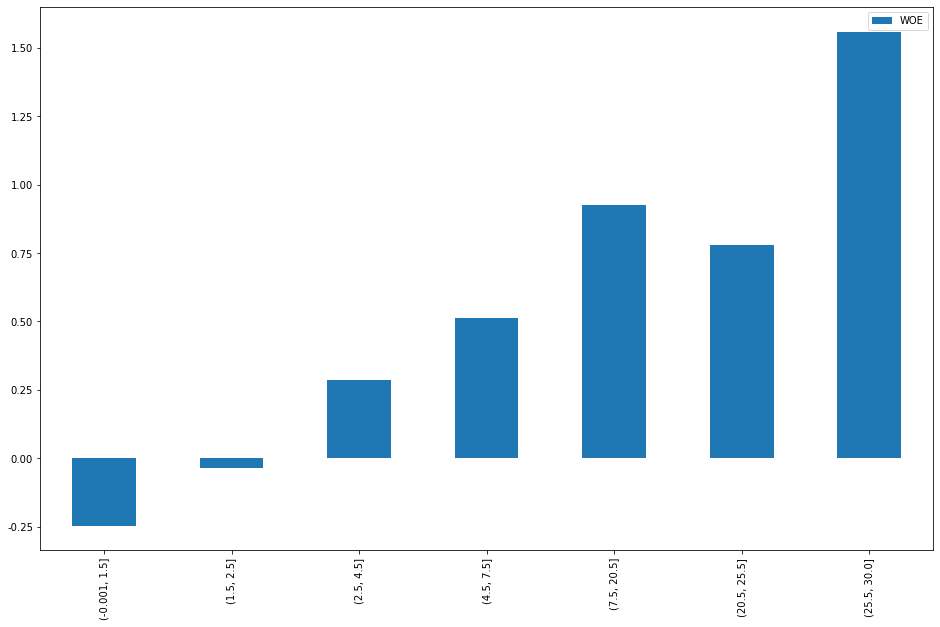

In [316]:
delta = smbin(train_data_d,y,'delta',max_bin=7)

In [317]:
delta.IVtable

,Bins,CntRec,CntGood,CntBad,PctRec,PctGood,PctBad,WOE,IV
0,"(-0.001, 1.5]",307756,207307,100449,0.637227,0.591712,0.757477,-0.2470,0.0409
1,"(1.5, 2.5]",29311,21053,8258,0.060690,0.060091,0.062273,-0.0357,0.0001
2,"(2.5, 4.5]",37203,28974,8229,0.077031,0.082700,0.062054,0.2872,0.0059
3,"(4.5, 7.5]",28189,22978,5211,0.058367,0.065586,0.039296,0.5122,0.0135
4,"(7.5, 20.5]",52455,45616,6839,0.108611,0.130201,0.051572,0.9261,0.0728
5,"(20.5, 25.5]",21054,17945,3109,0.043594,0.051220,0.023445,0.7815,0.0217
6,"(25.5, 30.0]",6993,6478,515,0.014479,0.018490,0.003884,1.5605,0.0228
7,Total,482961,350351,132610,1.000000,1.000000,1.000000,NaN,0.1777


In [318]:
iv_all.append(pd.Series({"delta":delta.IV}))

lasthtlordergap    0.1494
cityorders         0.1040
lastpvgap          0.0116
cr                 0.2041
sid                0.0114
visitnum           0.0272
h                  0.1186
delta              0.1777
dtype: float64

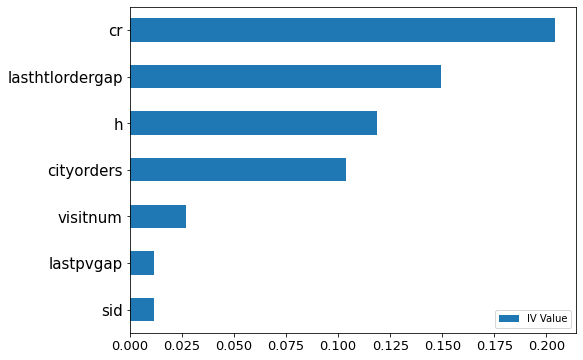

In [319]:
plt.figure(figsize=(8,6), color = 'orange')
iv_all.sort_values().plot.barh(label='IV Value')
plt.yticks(fontsize=15)
plt.xticks(fontsize=13)
plt.legend();

In [320]:
train_data_d_ = train_data_d.drop(columns=out,axis=1)

In [321]:
data_woe_d = smgen(train_data_d_,bin_list_d)
data_woe_d.head()

,lasthtlordergap,cityorders,cr,visitnum_oneyear,h,label,M,delta,lasthtlordergap_woe,cityorders_woe,cr_woe,visitnum_oneyear_woe,h_woe,M_woe,delta_woe
0,713.0,0.680,1.14,2162.0,18.0,1,2526.0,4,-0.8505,-0.0363,0.0824,-0.1015,-0.1287,-0.0797,0.2872
1,97890.0,0.027,1.00,1397.0,22.0,1,6550.0,0,-0.0117,0.3458,0.4353,-0.1015,0.5928,-0.4755,-0.2470
2,4601.0,0.813,1.07,2881.0,15.0,1,4235.0,0,-0.6745,-0.0363,0.4353,-0.1015,-0.1287,-0.2218,-0.2470
3,-1.0,3.033,1.00,1218.0,15.0,1,-350.0,0,0.4045,-0.2569,0.4353,0.0238,-0.1287,0.4243,-0.2470
4,52076.0,0.013,2.00,318.0,5.0,1,130.0,4,-0.2116,0.3458,-0.6823,0.0238,0.1212,0.1405,0.2872


In [322]:
X_train_d = data_woe_d.iloc[:,-len(bin_list_d):]
X_train_d.head()

,lasthtlordergap_woe,cityorders_woe,cr_woe,visitnum_oneyear_woe,h_woe,M_woe,delta_woe
0,-0.8505,-0.0363,0.0824,-0.1015,-0.1287,-0.0797,0.2872
1,-0.0117,0.3458,0.4353,-0.1015,0.5928,-0.4755,-0.2470
2,-0.6745,-0.0363,0.4353,-0.1015,-0.1287,-0.2218,-0.2470
3,0.4045,-0.2569,0.4353,0.0238,-0.1287,0.4243,-0.2470
4,-0.2116,0.3458,-0.6823,0.0238,0.1212,0.1405,0.2872


In [323]:
LR_d = LogisticRegression().fit(X_train_d,Y_train)

In [324]:
LR_d.score(X_train_d,Y_train)

0.7383826023219267

In [325]:
test_data_d = pd.concat([test_data_m,data_test['delta']],axis=1)

In [326]:
test_data_d.head()

,lasthtlordergap,cityorders,lastpvgap,cr,sid,visitnum_oneyear,h,label,M,delta
0,218111.0,0.107,179.0,1.000000,530,3415.0,6,1,9050.0,1
1,-1.0,9.160,35.0,1.000000,7,649.0,8,0,-138.0,0
2,19564.0,8.467,1725.0,1.050000,73,2979.0,12,1,16524.0,0
3,-1.0,6.960,250.0,1.136717,43,366.0,1,1,-350.0,0
4,-1.0,0.060,27344.0,1.136717,11,507.0,1,1,-350.0,18


In [327]:
test_woe_d = smgennew(test_data_d,bin_list_d)
test_woe_d.head()

,lasthtlordergap,cityorders,lastpvgap,cr,sid,visitnum_oneyear,h,label,M,delta,lasthtlordergap_woe,cityorders_woe,cr_woe,visitnum_oneyear_woe,h_woe,M_woe,delta_woe
0,218111.0,0.107,179.0,1.000000,530,3415.0,6,1,9050.0,1,0.1917,0.3458,0.4353,-0.1015,0.1212,-0.4755,-0.2470
1,-1.0,9.160,35.0,1.000000,7,649.0,8,0,-138.0,0,0.4045,-0.4243,0.4353,0.0238,-0.2369,0.1405,-0.2470
2,19564.0,8.467,1725.0,1.050000,73,2979.0,12,1,16524.0,0,-0.2116,-0.4243,0.4353,-0.1015,-0.2369,-0.7434,-0.2470
3,-1.0,6.960,250.0,1.136717,43,366.0,1,1,-350.0,0,0.4045,-0.4243,0.0824,0.0238,-0.0405,0.4243,-0.2470
4,-1.0,0.060,27344.0,1.136717,11,507.0,1,1,-350.0,18,0.4045,0.3458,0.0824,0.0238,-0.0405,0.4243,0.9261


In [328]:
X_test_d = test_woe_d.iloc[:,-len(bin_list_d):]
X_test_d.head()

,lasthtlordergap_woe,cityorders_woe,cr_woe,visitnum_oneyear_woe,h_woe,M_woe,delta_woe
0,0.1917,0.3458,0.4353,-0.1015,0.1212,-0.4755,-0.2470
1,0.4045,-0.4243,0.4353,0.0238,-0.2369,0.1405,-0.2470
2,-0.2116,-0.4243,0.4353,-0.1015,-0.2369,-0.7434,-0.2470
3,0.4045,-0.4243,0.0824,0.0238,-0.0405,0.4243,-0.2470
4,0.4045,0.3458,0.0824,0.0238,-0.0405,0.4243,0.9261


In [329]:
LR_d.score(X_test_d,Y_test)

0.7371101147914815

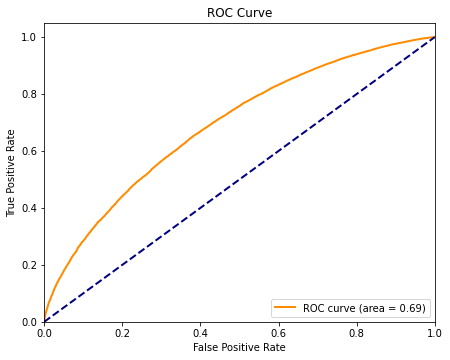

In [330]:
# ROC
y_score_d = LR_d.predict_proba(X_test_d)  # Random Forest
fpr, tpr, thresholds = roc_curve(Y_test, y_score_d[:, 1])
roc_auc = auc(fpr, tpr)
def drawRoc(roc_auc,fpr,tpr):
    plt.subplots(figsize=(7, 5.5))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()
drawRoc(roc_auc, fpr, tpr)

In [331]:
bbbb = pd.DataFrame({'intercept_':LR_d.intercept_[0]},index=['coef_'])
bbbb

,intercept_
coef_,0.96899


In [332]:
pd.concat([pd.DataFrame(dict(zip(X_train_d.columns,LR_d.coef_[0])),index=['coef_']),bbbb],axis=1)

,lasthtlordergap_woe,cityorders_woe,cr_woe,visitnum_oneyear_woe,h_woe,M_woe,delta_woe,intercept_
coef_,0.125659,0.476428,0.67154,0.773045,0.936209,0.494746,0.664516,0.96899


In [333]:
aaaa = pd.DataFrame({'LR.score(X_train,Y_train)':LR_d.score(X_train_d,Y_train),'LR.score(X_test,Y_test)':LR_d.score(X_test_d,Y_test)},index=['score'])

In [336]:
aaaa

,"LR.score(X_train,Y_train)","LR.score(X_test,Y_test)"
score,0.738383,0.73711


In [335]:
y_score_d = LR_d.predict_proba(X_test_d)  # Random Forest
fpr, tpr, thresholds = roc_curve(Y_test, y_score_d[:, 1])
roc_auc = auc(fpr, tpr)
y_pred = LR_d.predict(X_test_d)
scores = [round(i(Y_test, y_pred),3 )for  i in (accuracy_score,precision_score,\
                                     recall_score,f1_score)]
scores.insert(0,roc_auc)
core_metrics = prettytable.PrettyTable()  # Create Table
core_metrics.field_names = ['auc', 'accuracy', 'precision', 'recall', 'f1']  # Define Table Columns
core_metrics.add_row(scores)  # Add data
print('core metrics\n',core_metrics)

core metrics
 +--------------------+----------+-----------+--------+------+
|        auc         | accuracy | precision | recall |  f1  |
+--------------------+----------+-----------+--------+------+
| 0.6897174403047869 |  0.737   |   0.751   | 0.953  | 0.84 |
+--------------------+----------+-----------+--------+------+
